In [6]:
import numpy as np
import gym
from time import sleep
import random
from IPython.display import clear_output
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
Timestep: 1116
State: 0
Action: 5
Reward: 20
Timesteps taken: 1117
Penalties incurred: 347


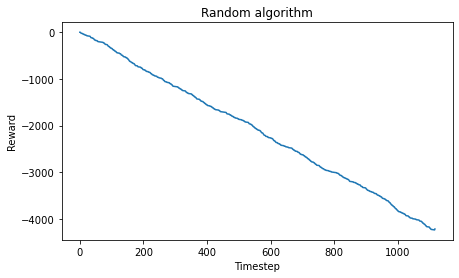

In [32]:
env = gym.make("Taxi-v3").env

env.s = 328

epochs = 0
penalties, reward = 0, 0
time = 0

temp = [0]
total_reward = 0

done = False

while not done:
    action = env.action_space.sample()
    state, reward, done, info = env.step(action)
    
    if reward == -10:
        penalties += 1
    
    total_reward += reward
    temp.append(total_reward)
    
    clear_output(wait=True)
    env.render()
    print(f"Timestep: {time}")
    print(f"State: {state}")
    print(f"Action: {action}")
    print(f"Reward: {reward}")
    sleep(.1)
    time += 1

print("Timesteps taken: {}".format(time))
print("Penalties incurred: {}".format(penalties))    

plt.plot(np.squeeze(temp))
plt.ylabel('Reward')
plt.xlabel('Timestep')
plt.title('Random algorithm')
plt.show()

In [7]:
def test_1(Q, num_iterations, alpha, gamma):
    env = gym.make("Taxi-v3").env

    penalties, reward = 0, 0
    time = 0

    temp = [0]
    total_reward = 0

    done = False
    
    state = env.reset()
    
    while not done:
        action = np.argmax(Q[state])
        state, reward, done, info = env.step(action)
    
        if reward == -10:
            penalties += 1
    
        total_reward += reward
        temp.append(total_reward)
        
        clear_output(wait=True)
        env.render()
        print(f"Timestep: {time}")
        print(f"State: {state}")
        print(f"Action: {action}")
        print(f"Reward: {reward}")
        sleep(.1)
        time += 1

    print("Timesteps taken: {}".format(time))
    print("Penalties incurred: {}".format(penalties))
    print("Total reward: {}".format(total_reward))

    plt.plot(np.squeeze(temp))
    plt.ylabel('Reward')
    plt.xlabel('Timestep')
    plt.title(f'Q-algorithm: num_itarations = {num_iterations}, alpha = {alpha}, gamma = {gamma}')
    plt.show()

In [19]:
def test_2(Q):
    env = gym.make("Taxi-v3").env

    penalties, reward = 0, 0
    time = 0

    temp = [0]
    total_reward = 0
    
    done = False
    
    state = env.reset()
    
    while not done:
        action = np.argmax(Q[state])
        state, reward, done, info = env.step(action)
    
        if reward == -10:
            penalties += 1
    
        total_reward += reward
        
        time += 1
        if time >= 100:
            break

    return (total_reward / time)

In [20]:
def train(num_iterations = 1000, alpha = 0.5, gamma = 0.9, epsilon = 0.1):
    
    env = gym.make("Taxi-v3").env
    Q = np.zeros([env.observation_space.n, env.action_space.n])
    temp = []
    for i in range(0, num_iterations):
        epochs = 0
        penalties, reward = 0, 0
        state = env.reset()
        done = False
        while not done:
            if random.uniform(0, 1) < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(Q[state])
                
            next_state, reward, done, info = env.step(action)

            old_value = Q[state, action]
            next_max = np.max(Q[next_state])
        
            new_value = (1 - alpha) * old_value + alpha * \
                (reward + gamma * next_max)
            Q[state, action] = new_value
            
            if epochs % 100 == 0 and epochs > 0:
                temp.append(test_2(Q))
            
            if reward == -10:
                penalties += 1
            
            state = next_state
            epochs += 1
    
    plt.plot(np.squeeze(temp))
    plt.ylabel('Training episode returns')
    plt.xlabel('Training iteration')
    plt.show()
    return Q

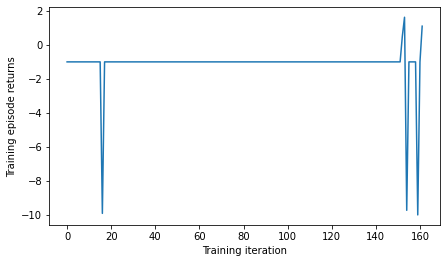

In [25]:
Q = train(10000, 0.5, 0.9, 0.1)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
Timestep: 12
State: 85
Action: 5
Reward: 20
Timesteps taken: 13
Penalties incurred: 0
Total reward: 8


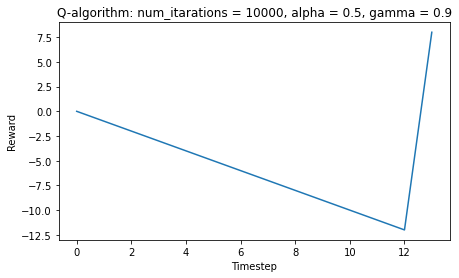

In [26]:
test_1(Q, 10000, 0.5, 0.9)

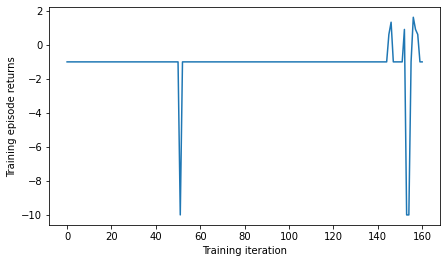

In [27]:
Q = train(20000, 0.5, 0.9, 0.1)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
Timestep: 11
State: 0
Action: 5
Reward: 20
Timesteps taken: 12
Penalties incurred: 0
Total reward: 9


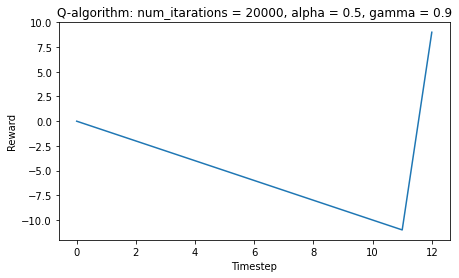

In [28]:
test_1(Q, 20000, 0.5, 0.9)

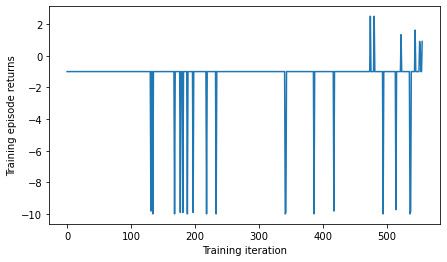

In [29]:
Q = train(10000, 0.1, 0.9, 0.1)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
Timestep: 13
State: 0
Action: 5
Reward: 20
Timesteps taken: 14
Penalties incurred: 0
Total reward: 7


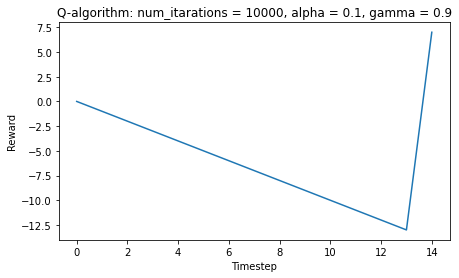

In [30]:
test_1(Q, 10000, 0.1, 0.9)

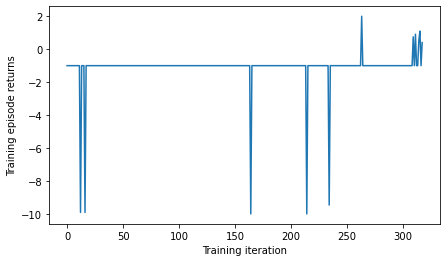

In [31]:
Q = train(10000, 0.2, 0.9, 0.1)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
Timestep: 11
State: 475
Action: 5
Reward: 20
Timesteps taken: 12
Penalties incurred: 0
Total reward: 9


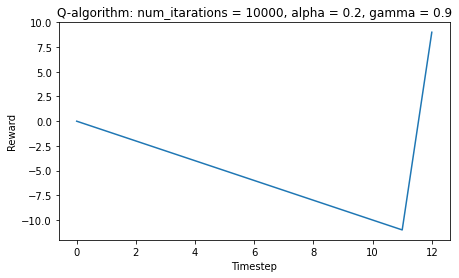

In [32]:
test_1(Q, 10000, 0.2, 0.9)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
Timestep: 16
State: 475
Action: 5
Reward: 20
Timesteps taken: 17
Penalties incurred: 0
Total reward: 4


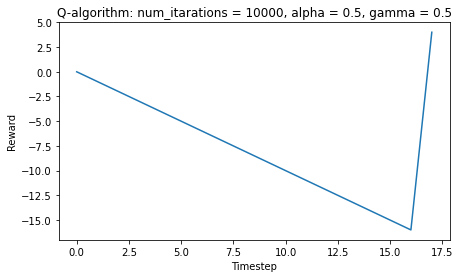

In [61]:
Q = train(10000, 0.5, 0.5, 0.1)
test_1(Q, 10000, 0.5, 0.5)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
Timestep: 16
State: 475
Action: 5
Reward: 20
Timesteps taken: 17
Penalties incurred: 0
Total reward: 4


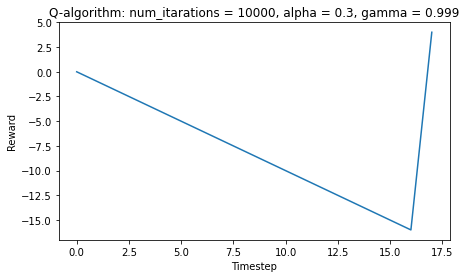

In [64]:
Q = train(10000, 0.3, 0.999, 0.1)
test_1(Q, 10000, 0.3, 0.999)

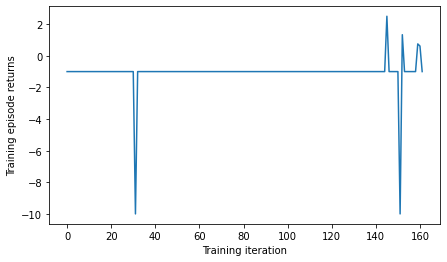

In [24]:
Q = train(500, 0.5, 0.99, 0.1)
#test_1(Q, 500, 0.5, 0.99)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
Timestep: 11
State: 85
Action: 5
Reward: 20
Timesteps taken: 12
Penalties incurred: 0
Total reward: 9


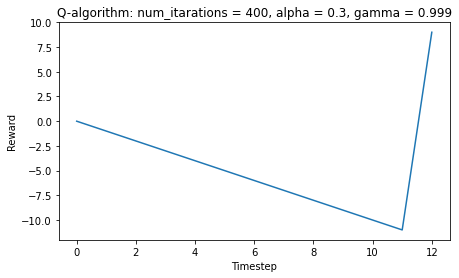

In [71]:
Q = train(400, 0.3, 0.999, 0.1)
test_1(Q, 400, 0.3, 0.999)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
Timestep: 10
State: 410
Action: 5
Reward: 20
Timesteps taken: 11
Penalties incurred: 0
Total reward: 10


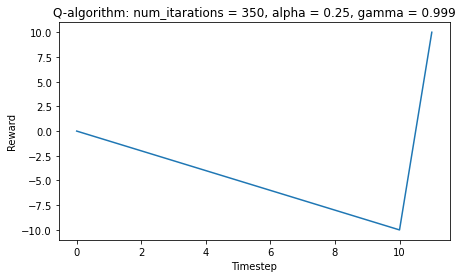

In [102]:
Q = train(350, 0.25, 0.999, 0.1)
test_1(Q, 350, 0.25, 0.999)